In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')
astros

,Gm#,Date,Tm,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Season
0,1,"Thursday, Mar 30",HOU,CHW,L,2,3,NaN,0-1,4,1.0,Graveman,Pressly,López,2:38,N,43032.0,0.92,-,2023
1,2,"Friday, Mar 31",HOU,CHW,W,6,3,NaN,1-1,3,0.5,Martinez,Graveman,Montero,2:40,N,41453.0,0.92,+,2023
2,3,"Saturday, Apr 1",HOU,CHW,W,6,4,NaN,2-1,2,0.5,Stanek,Kelly,Neris,3:11,D,37519.0,0.93,++,2023
3,4,"Sunday, Apr 2",HOU,CHW,L,3,6,NaN,2-2,3,1.5,Clevinger,Garcia,NaN,3:06,D,42835.0,1.00,-,2023
4,5,"Monday, Apr 3",HOU,DET,L,6,7,11.0,2-3,3,1.5,Wingenter,Neris,Hill,3:21,N,29272.0,0.93,--,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,158,"Wednesday, Sep 27",HOU,TEX,W,12,2,NaN,98-60,1,up20.0,Verlander,Martinez,NaN,3:17,D,26053.0,0.18,+++,2017
1028,159,"Thursday, Sep 28",HOU,BOS,W,12,2,NaN,99-60,1,up21.0,Peacock,Rodriguez,NaN,3:31,N,34222.0,0.10,++++,2017
1029,160,"Friday, Sep 29",HOU,BOS,W,3,2,NaN,100-60,1,up21.0,Morton,Fister,Giles,2:47,N,36623.0,0.07,+++++,2017
1030,161,"Saturday, Sep 30",HOU,BOS,L,3,6,NaN,100-61,1,up21.0,Pomeranz,McCullers,NaN,3:19,D,35722.0,0.14,-,2017


In [14]:
astros.dtypes

Gm#             int64
Date           object
Tm             object
Opp            object
W/L            object
R               int64
RA              int64
Inn           float64
W-L            object
Rank            int64
GB             object
Win            object
Loss           object
Save           object
Time           object
D/N            object
Attendance    float64
cLI           float64
Streak         object
Season          int64
dtype: object

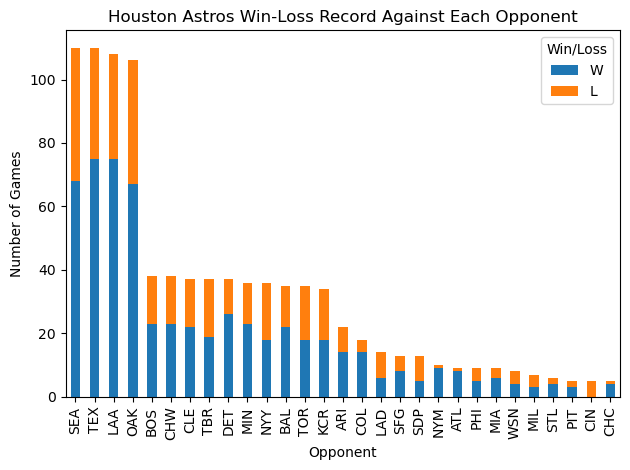

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Add a new column for total games played against each opponent
win_loss_counts['Total_Games'] = win_loss_counts['W'] + win_loss_counts['L']

# Sort by total games in descending order
win_loss_counts = win_loss_counts.sort_values(by='Total_Games', ascending=False)

# Plotting the sorted win-loss counts
win_loss_counts[['W', 'L']].plot(kind='bar', stacked=True)
plt.title('Houston Astros Win-Loss Record Against Each Opponent')
plt.xlabel('Opponent')
plt.ylabel('Number of Games')
plt.legend(title='Win/Loss')
plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


In [20]:
# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Calculate win percentage for better comparison
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)
win_loss_counts

W/L,L,L-wo,W,W-wo,Win_Percentage
Opp,,,,,
NYM,1,0,9,0,0.900000
ATL,1,1,8,0,0.888889
CHC,1,0,4,1,0.800000
COL,4,1,14,1,0.777778
DET,11,2,26,1,0.702703
LAA,33,7,75,3,0.694444
TEX,35,4,75,4,0.681818
STL,2,0,4,0,0.666667
MIA,3,0,6,0,0.666667
